In [1]:
import pandas as pd
scdf = pd.read_csv("Most-Recent-Cohorts-Scorecard-Elements.csv")
trdf = pd.read_csv("Most-Recent-Cohorts-Treasury-Elements.csv") #this has post school earnings

In [2]:
school_df = scdf[['UNITID','INSTNM','MD_EARN_WNE_P10', 'GRAD_DEBT_MDN_SUPP', 'STABBR']]
school_df.head()

,UNITID,INSTNM,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP,STABBR
0,100654,Alabama A & M University,31000,32750,AL
1,100663,University of Alabama at Birmingham,41200,21833,AL
2,100690,Amridge University,39600,22890,AL
3,100706,University of Alabama in Huntsville,46700,22647,AL
4,100724,Alabama State University,27700,31500,AL


In [3]:
school_df['MD_EARN_WNE_P10'] = school_df['MD_EARN_WNE_P10'].replace('PrivacySuppressed', 0)
school_df['GRAD_DEBT_MDN_SUPP'] = school_df['GRAD_DEBT_MDN_SUPP'].replace('PrivacySuppressed', 0)
school_df['MD_EARN_WNE_P10'] = pd.to_numeric(school_df['MD_EARN_WNE_P10'])
school_df['GRAD_DEBT_MDN_SUPP'] = pd.to_numeric(school_df['GRAD_DEBT_MDN_SUPP'])
school_df = school_df[school_df.GRAD_DEBT_MDN_SUPP != 0]
school_df = school_df[school_df.MD_EARN_WNE_P10 != 0]
school_df = school_df.sort_values(['MD_EARN_WNE_P10'], ascending = False)
school_df['EARN_DEBT_RATIO'] = school_df['MD_EARN_WNE_P10'] / school_df['GRAD_DEBT_MDN_SUPP']
school_df.head(10)

/Users/stephensalisbury/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/stephensalisbury/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/stephensalisbury/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,UNITID,INSTNM,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP,STABBR,EARN_DEBT_RATIO
3859,237880,West Virginia School of Osteopathic Medicine,224300.0,4800.0,WV,46.729167
3153,215123,Philadelphia College of Osteopathic Medicine,186100.0,5250.0,PA,35.447619
239,110699,University of California-San Francisco,143700.0,6500.0,CA,22.107692
973,145558,Rosalind Franklin University of Medicine and S...,132300.0,6000.0,IL,22.050000
2461,196255,SUNY Downstate Medical Center,127900.0,12500.0,NY,10.232000
2210,188526,Albany College of Pharmacy and Health Sciences,124700.0,27000.0,NY,4.618519
1970,179265,St. Louis College of Pharmacy,124100.0,19500.0,MO,6.364103
70,103778,Thunderbird School of Global Management,118000.0,20000.0,AZ,5.900000
1591,166656,MCPHS University,116000.0,27000.0,MA,4.296296
215,110398,University of California-Hastings College of Law,114700.0,3000.0,CA,38.233333


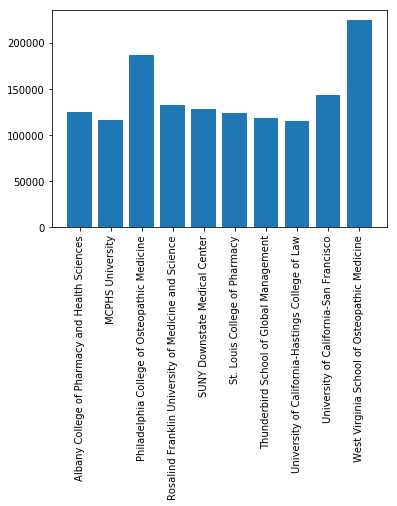

In [4]:
import matplotlib.pyplot as plt
x = school_df['INSTNM'].iloc[:10]
y = school_df['MD_EARN_WNE_P10'].iloc[:10]

plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

In [5]:
school_df.groupby(['STABBR'])['MD_EARN_WNE_P10'].median()

STABBR
AK    37350.0
AL    32200.0
AR    27600.0
AZ    29800.0
CA    34800.0
CO    32850.0
CT    39900.0
DC    45900.0
DE    35800.0
FL    30900.0
GA    31450.0
GU    30100.0
HI    37550.0
IA    35800.0
ID    29350.0
IL    33600.0
IN    30100.0
KS    34000.0
KY    28800.0
LA    29000.0
MA    41750.0
MD    37300.0
ME    32900.0
MI    30700.0
MN    36400.0
MO    32200.0
MS    27500.0
MT    35500.0
NC    33200.0
ND    39300.0
NE    37650.0
NH    38200.0
NJ    36100.0
NM    31400.0
NV    29300.0
NY    39700.0
OH    33100.0
OK    33050.0
OR    31400.0
PA    39800.0
PR    19250.0
RI    41050.0
SC    29200.0
SD    36600.0
TN    30500.0
TX    31400.0
UT    28800.0
VA    35800.0
VI    32000.0
VT    35450.0
WA    36100.0
WI    37600.0
WV    28000.0
WY    31800.0
Name: MD_EARN_WNE_P10, dtype: float64

In [9]:
import numpy as np
a = school_df['MD_EARN_WNE_P10'].dropna()
np.median(a)

33700.0